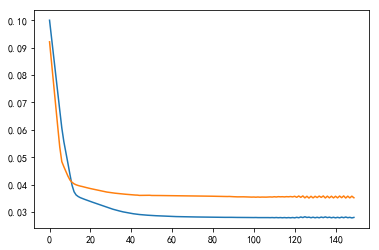

In [11]:
%matplotlib inline
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
import numpy as np
from numpy import *
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False
mem = Memory("./mycache")

def Gw(w,x,y,size,b):
    G=[0 for i in range(14)]
    L=[0 for i in range(size)]
    g=[0 for i in range(14)]
    sumG=0
    l=0
    x_temp=x*w
    for i in range(size):
        if(1-(y[i,0])*((x_temp)[i,0])-b>=0):
            for j in range(14):
                G[j]=G[j]-y[i,0]*x[i,j]
            L[i]=1-(y[i,0])*((x_temp)[i,0])-b
    for i in range(size):
        l=l+L[i]
    l=l*0.1
    for i in range(14):
        l=l+(w[i,0]**2)/2
    g=np.mat(G)
    return g.T,l/size#sumG,l

def Gb(w,x,y,size,b):
    G=0
    g=[0 for i in range(14)]
    l=0
    x_temp=x*w
    for i in range(size):
        if(1-(y[i,0])*((x_temp)[i,0])-b>=0):
            G=G-y[i,0]
    #g=np.mat(G)
    return G 


def validation(w,x,y,size,b):
    L=[0 for i in range(size)]
    l=0
    x_temp=x*w
    for i in range(size):
        if(1-(y[i,0])*((x_temp)[i,0]-b)>=0):
            L[i]=1-(y[i,0])*((x_temp)[i,0])
    for i in range(size):
        l=l+L[i]
    l=l*0.1
    for i in range(14):
        l=l+(w[i,0]**2)/2
    return l/size

@mem.cache
def get_data():
    data = load_svmlight_file("G:\\Users\\qqqqqq1997520\\Desktop\\australian.txt")
    return data[0], data[1]

X, y = get_data()
w=np.mat([[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]])
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size=0.2, random_state=42)

Xtrain=X_train.todense()
Xvali=X_vali.todense()
Xtrain=np.transpose(Xtrain)
Xtrain=Xtrain.T
Ytrain=np.mat(y_train).T
Yvali=np.mat(y_vali).T
#X2train=np.column_stack((Xtrain,ones(552)))
#X2vali=np.column_stack((Xvali,ones(138)))

C=0.1
alpha=0.0015
#LT=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#LV=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
LT=[0 for i in range(150)]
LV=[0 for i in range(150)]
k=0
b=0
for i in range(150):
    dw,Lt=Gw(w,Xtrain,Ytrain,552,b)
    db=Gb(w,Xtrain,Ytrain,552,b)
    dw=w+C*dw
    db=C*db
    w=w-alpha*dw
    b=b-alpha*db
    LT[k]=Lt
    LV[k]=validation(w,Xvali,Yvali,138,b)
    k+=1
    #print(dw)
#print(LT)
#LV=validation(w,Xvali,Yvali,138,b)
#print(LV)

#print(y_train)
#Xtrain
#x=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
x=[i for i in range(150)]
plt.figure(1)
#plt.subplot(211)
plt.plot(x,LT)#蓝色是训练集Loss
plt.plot(x,LV)#橙色是验证集Loss